In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Insurance.csv')

In [7]:
df.head()

,TARGET_CLM_FLAG,TARGET_CLM_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,NPOLICY,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,NaN,0,51.0,0,12.0,85076.0,No,249276.0,Yes,...,4,2,Sports Car,no,0,0,Yes,1,8.0,Highly Urban/ Urban
1,1,6872.0,0,37.0,0,10.0,55076.0,No,245993.0,Yes,...,4,2,Van,no,0,0,No,1,1.0,Highly Urban/ Urban
2,1,6716.0,3,36.0,4,0.0,NaN,No,0.0,Yes,...,4,2,SUV,no,0,0,No,5,10.0,Highly Urban/ Urban
3,0,NaN,0,52.0,0,12.0,68564.0,No,274122.0,Yes,...,4,1,Pickup,yes,0,0,No,2,11.0,Highly Rural/ Rural
4,1,5970.0,0,33.0,4,14.0,30504.0,Yes,0.0,No,...,6,2,Pickup,no,0,0,No,0,NaN,Highly Urban/ Urban


In [23]:
# Quick stats on database
# T = transpose
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
TARGET_CLM_FLAG,10302.0,0.27,0.44,0.0,0.0,0.0,1.00,1.0
TARGET_CLM_AMT,2746.0,5669.73,7759.06,30.0,2641.0,4107.5,5727.75,123247.0
KIDSDRIV,10302.0,0.17,0.51,0.0,0.0,0.0,0.00,4.0
AGE,10295.0,44.84,8.61,16.0,39.0,45.0,51.00,81.0
HOMEKIDS,10302.0,0.72,1.12,0.0,0.0,0.0,1.00,5.0
YOJ,9754.0,10.47,4.11,0.0,9.0,11.0,13.00,23.0
INCOME,9732.0,61572.07,47457.20,0.0,27584.0,53529.0,86166.00,367030.0
HOME_VAL,9727.0,154523.02,129188.44,0.0,0.0,160661.0,238256.00,885282.0
TRAVTIME,10302.0,33.42,15.87,5.0,22.0,33.0,44.00,142.0
BLUEBOOK,10302.0,15659.92,8428.77,1500.0,9200.0,14400.0,20890.00,69740.0


In [30]:
dt = df.dtypes
dt

# find the variables that are objects strings and floats

strings = []
ints = []
floats = []

for i in dt.index:
    if dt[i] in (['object']) : strings.append(i)
    if dt[i] in (['int64']) : ints.append(i)
    if dt[i] in (['float64']) : floats.append(i)

print(strings)
print('-----------')
print(ints)
print('-----------')
print(floats)

['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
-----------
['TARGET_CLM_FLAG', 'KIDSDRIV', 'HOMEKIDS', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'NPOLICY', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS']
-----------
['TARGET_CLM_AMT', 'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']


In [39]:
for i in strings :
    print(" Class = ", i )
    g = df.groupby( i )
    print( g[i].count() )

 Class =  PARENT1
PARENT1
No     8959
Yes    1343
Name: PARENT1, dtype: int64
 Class =  MSTATUS
MSTATUS
No     4114
Yes    6188
Name: MSTATUS, dtype: int64
 Class =  SEX
SEX
F    5545
M    4757
Name: SEX, dtype: int64
 Class =  EDUCATION
EDUCATION
a_PhD                934
b_Masters           2078
c_Bachelors         2823
d_High School       2952
e_No_High School    1515
Name: EDUCATION, dtype: int64
 Class =  JOB
JOB
Blue Collar     2288
Clerical        1590
Doctor           321
Home Maker       843
Lawyer          1031
Manager         1257
Professional    1408
Student          899
Name: JOB, dtype: int64
 Class =  CAR_USE
CAR_USE
Commercial    3789
Private       6513
Name: CAR_USE, dtype: int64
 Class =  CAR_TYPE
CAR_TYPE
Minivan        2694
Panel Truck     853
Pickup         1772
SUV            2883
Sports Car     1179
Van             921
Name: CAR_TYPE, dtype: int64
 Class =  RED_CAR
RED_CAR
no     7326
yes    2976
Name: RED_CAR, dtype: int64
 Class =  REVOKED
REVOKED
No     9041
Ye

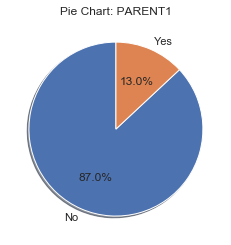

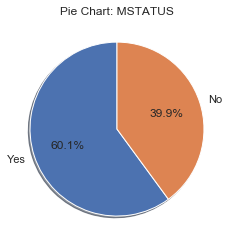

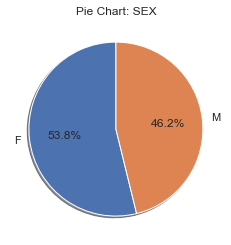

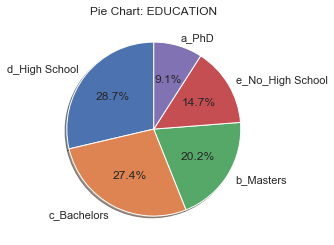

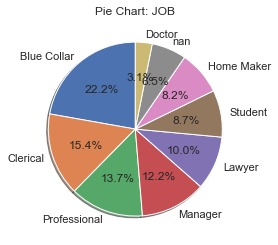

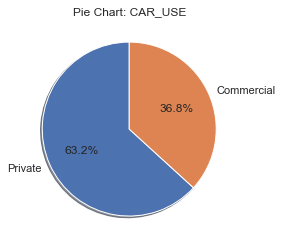

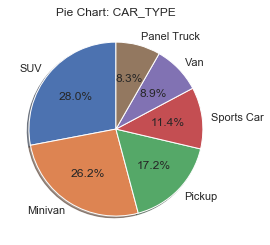

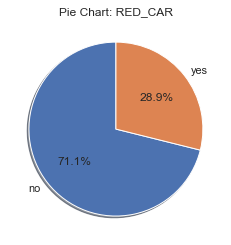

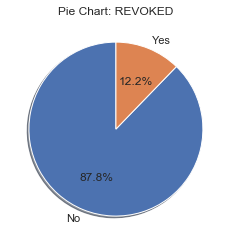

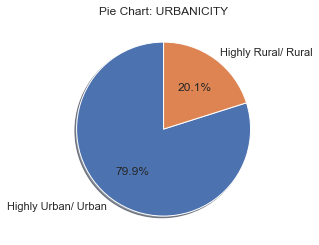

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for i in strings:
    x = df[i].value_counts(dropna=False)
    theLabels = x.axes[0].tolist()
    #print( theLabels )
    theSlices = list(x)
    #print( theSlices ) 
    plt.pie( theSlices,
            labels=theLabels,
            startangle = 90,
            shadow=True,
            autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
    plt.show()

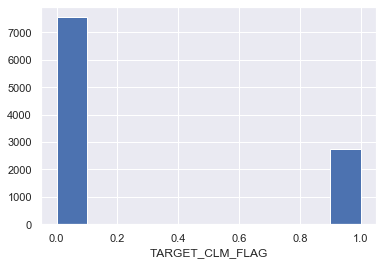

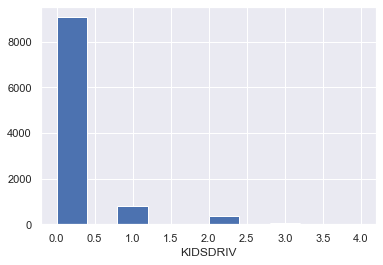

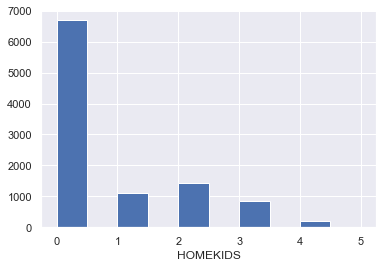

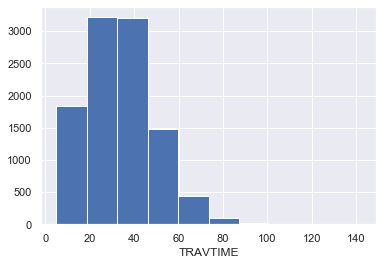

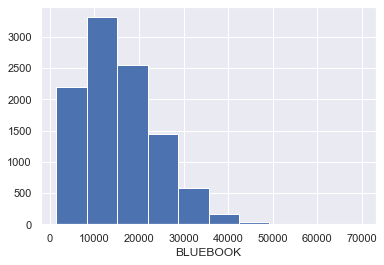

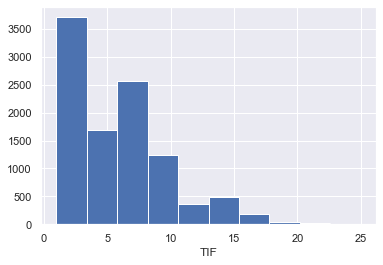

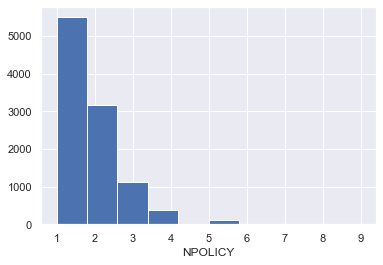

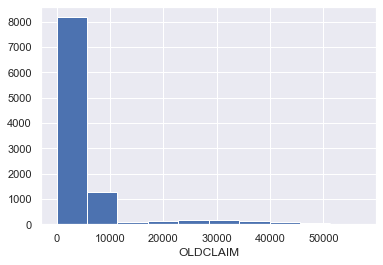

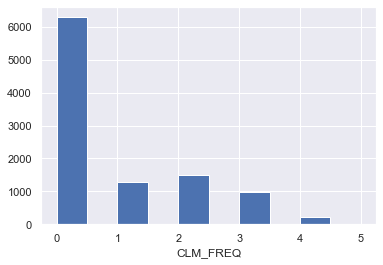

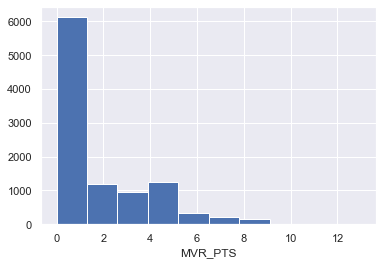

In [56]:
for i in ints:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()